# 4.10 Further analysis to answer key questions 

## Contents
1. What are the busiest days of the week and hours of the day?
2. Are there particular times of the day when people spend the most money?
3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
4. Are there certain types of products that are more popular than others?
5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
6. Are there differences in ordering habits based on a customer’s loyalty status?
7. Are there differences in ordering habits based on a customer’s region?
8. Is there a connection between age and family status in terms of ordering habits?
9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [1]:
# Load librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Assign path variable
path = '/Users/mariamaske/Instacart Basket Analysis'

In [4]:
# import the project file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [5]:
df.shape

(32404859, 36)

## 1. What are the busiest days of the week and hours of the day?

In [12]:
# count order number by days of the week
count_order_by_day = df.groupby('orders_day_of_week')['order_id'].nunique()

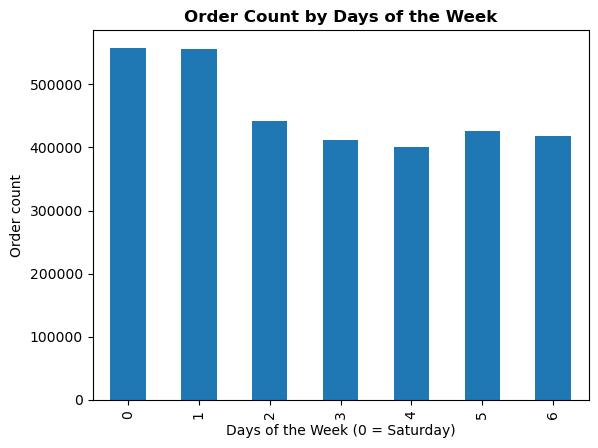

In [13]:
# create a bar chat to visualize the order distribution in a week
busiest_day = count_order_by_day.plot.bar()

# customize the plot
plt.xlabel('Days of the Week (0 = Saturday)')
plt.ylabel('Order count')
plt.title('Order Count by Days of the Week', fontweight='bold')

# show the plot
plt.show()

In [14]:
busiest_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_busiest_day_of_week.png'))

In [9]:
# count order number by hours of the day
count_order_by_hour = df.groupby('order_hour_of_day')['order_id'].nunique()

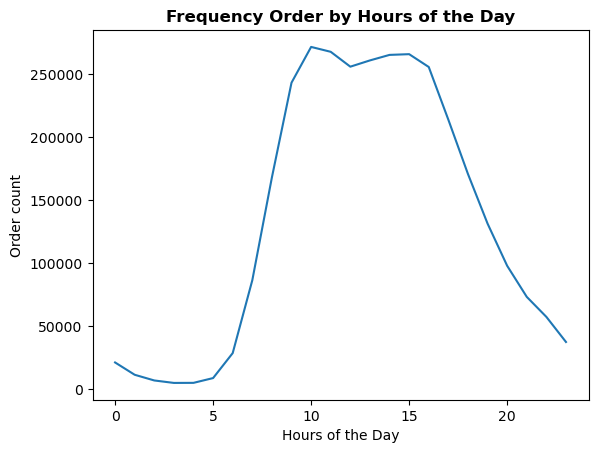

In [10]:
# create a line chart to visualize the order distribution in a day
busiest_hour = sns.lineplot(x=count_order_by_hour.index, y=count_order_by_hour.values)

# customize the plot
plt.xlabel('Hours of the Day')
plt.ylabel('Order count')
plt.title('Frequency Order by Hours of the Day', fontweight='bold')

# show the plot
plt.show()

In [20]:
busiest_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_busiest_hour_of_day.png'))

### Answers:
##### Top three busiest days of the week are: Saturday, Sunday and Friday
##### Top hours of the day are: from 9 to 16.

## 2. Are there particular times of the day when people spend the most money?

In [15]:
# create a sales column
df['sales'] = df['add_to_cart_order'] * df['prices']

In [16]:
# calculate the average of sales grouped by day of the week
sales_by_day = df.groupby('orders_day_of_week')['sales'].mean()

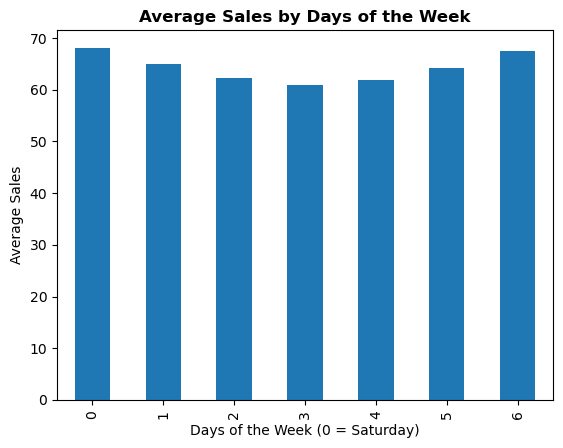

In [17]:
# create a bar chart to visualize the average sales distribution in a week
spending_day = sales_by_day.plot.bar()

# customize the plot
plt.xlabel('Days of the Week (0 = Saturday)')
plt.ylabel('Average Sales')
plt.title('Average Sales by Days of the Week', fontweight='bold')

# show the plot
plt.show()

In [18]:
# calculate the average of sales grouped by hours of the day
sales_by_hour = df.groupby('order_hour_of_day')['sales'].mean()

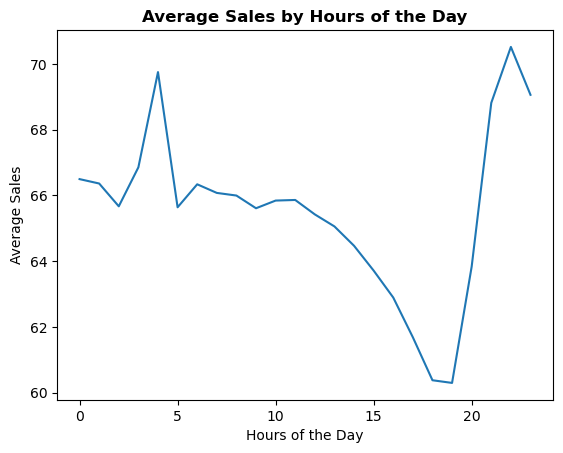

In [19]:
# create a line chart to visualize the average sales distribution in a day
spending_hour = sns.lineplot(x=sales_by_hour.index, y= sales_by_hour.values)

# customize the plot
plt.xlabel('Hours of the Day')
plt.ylabel('Average Sales')
plt.title('Average Sales by Hours of the Day', fontweight='bold')

# show the plot
plt.show()

### Answer: Sales peak at 3-5 and 20-23.

In [21]:
spending_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_spending_hour_of_day.png'))

## 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

### Answer from Exercise 4.7
Price range groupings:
- for items with price <= 5, labeled as 'Low-range product'
- for items with price > 5 and price <= 15, labeled as 'Mid-range product'
- for items with price > 15, labeled as 'High-range product'

In [23]:
# calculate the frequency of each labeling
df['price_range_loc'].value_counts(dropna = False)

Mid-range product     21861558
Low-range product     10126321
High-range product      416980
Name: price_range_loc, dtype: int64

## 4. Are there certain types of products that are more popular than others?

In [24]:
df['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

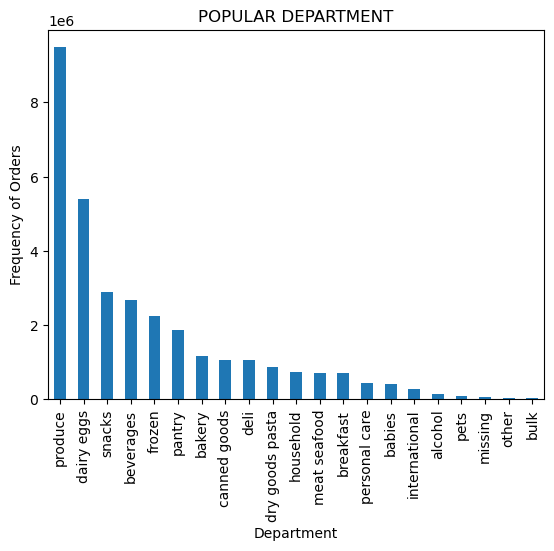

In [32]:
# create a bar chart to visualize the popular departments
popular_products=df['department'].value_counts(dropna=False).plot.bar()
# customize the plot
plt.xlabel('Department')
plt.ylabel('Frequency of Orders')
plt.title('POPULAR DEPARTMENT')
# show the plot
plt.show()

### Answer: There are three departments with the highest frequency of product orders: produce, dairy, snacks, meaning products from the these departments are more popular than others

In [33]:
popular_products.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_popular_products.png'))

## 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [30]:
# calculate the frequency of each labeling
df['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

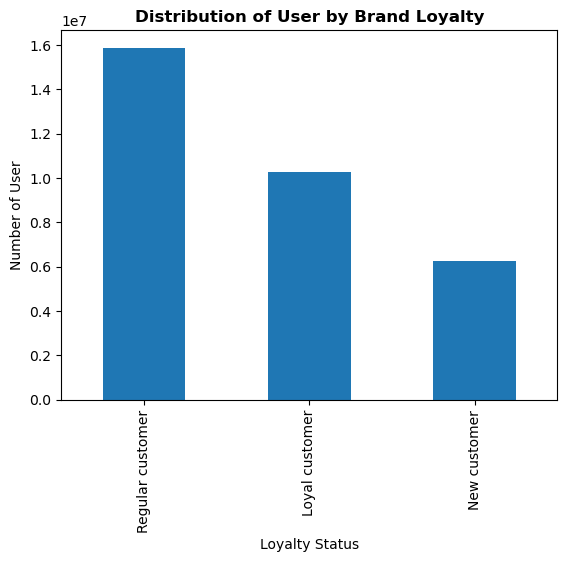

In [37]:
# create a bar chart to visualize the distribution of users in regards to their brand loyalty
loyal_customer=df['loyalty_flag'].value_counts().plot.bar()

# customize the plot
plt.xlabel('Loyalty Status')
plt.ylabel('Number of User')
plt.title('Distribution of User by Brand Loyalty', fontweight='bold')

# show the plot
plt.show()

In [39]:
loyal_customer.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyal_customers.png'))

## 6. Are there differences in ordering habits based on a customer’s loyalty status?

In [43]:
# create a crosstab between the "loyalty_flag" column and the "frequency_flag" column
crosstab_loyalty_frequency = pd.crosstab(df['loyalty_flag'], df['order_frequency_flag'], normalize = 'index', dropna = False)
crosstab_loyalty_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,0.999598,0.000000,0.000402
New customer,0.264041,0.436414,0.299545
Regular customer,0.606623,0.057409,0.335967


In [47]:
# check the basic statistics of the median_frequency for each loyalty category
df.groupby('loyalty_flag')['median_last_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_flag,,,,,,,,
Loyal customer,10284093.0,5.170559,1.703377,0.0,4.0,5.0,7.0,14.0
New customer,6243985.0,18.459990,9.132274,0.0,10.0,18.0,30.0,30.0
Regular customer,15876776.0,10.612951,5.081751,0.0,7.0,9.0,13.0,30.0


In [48]:
# calculate the average of median_frequency for each loyalty category
loyalty_flag_median = df.groupby('loyalty_flag')['median_last_orders'].mean()

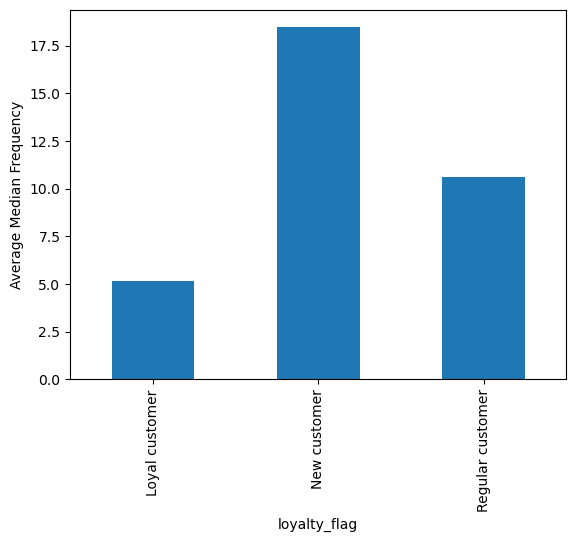

In [49]:
# create a bar chart to visualize 
loyalty_median = loyalty_flag_median.plot.bar()

# customize the plot
plt.ylabel('Average Median Frequency')

# show the plot
plt.show()

### Answer: Loyal customers have the lowest average median of “days_last_prior_order” of around 5.2 days when compared to regular customers who have an average of 10.6 days, while new customers have an average of around 18 days before their next order.

In [50]:
loyalty_median.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyal_median.png'))

### Check ordering habits by price of products

In [52]:
# create a crosstab between the "loyalty_flag" column and the "price_range_loc" column
crosstab_loyalty_pricerange = pd.crosstab(df['loyalty_flag'], df['price_range_loc'], normalize = 'index', dropna = False)
crosstab_loyalty_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,0.011654,0.312589,0.675757
New customer,0.013685,0.312744,0.673571
Regular customer,0.013332,0.312334,0.674333


In [53]:
# check the basic statistics of the product prices for each loyalty category
df.groupby('loyalty_flag')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_flag,,,,,,,,
Loyal customer,10284093.0,7.772831,4.206453,1.0,4.2,7.4,11.2,25.0
New customer,6243990.0,7.800320,4.267167,1.0,4.2,7.4,11.3,25.0
Regular customer,15876776.0,7.797431,4.255204,1.0,4.2,7.4,11.3,25.0


In [54]:
# calculate the average of product prices for each loyalty category
loyalty_flag_prices = df.groupby('loyalty_flag')['prices'].mean()

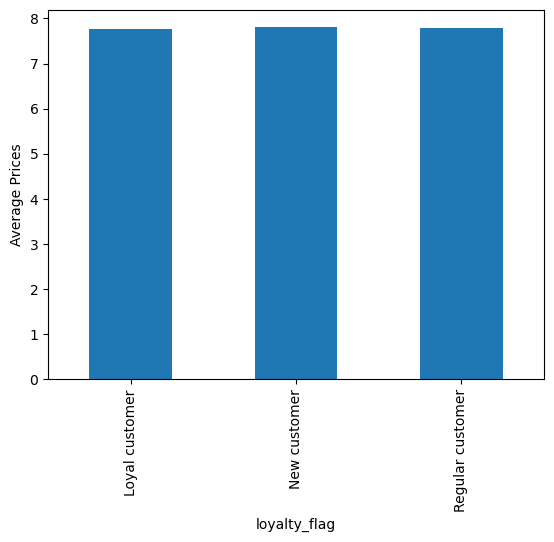

In [55]:
# create a bar chart to visualize 
loyalty_prices = loyalty_flag_prices.plot.bar()

# customize the plot
plt.ylabel('Average Prices')

# show the plot
plt.show()

### Answer: Loyal customers have slightly lower mean products price than regular and new customers, while new customers having a very slightly higher average products price.

## 7. Are there differences in ordering habits based on a customer’s region?

In [58]:
# create a crosstab between the "Region" column and the "frequency_flag" column
crosstab_region_frequency = pd.crosstab(df['region'], df['order_frequency_flag'], normalize = 'index', dropna = False)
crosstab_region_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,0.660457,0.113648,0.225895
Northeast,0.664816,0.110119,0.225065
South,0.666461,0.112593,0.220946
West,0.668668,0.111872,0.219460


In [61]:
# check the basic statistics of the median_frequency for each region
df.groupby('region')['order_frequency_flag'].describe()

,count,unique,top,freq
region,,,,
Midwest,7597325,3,Frequent customer,5017709
Northeast,5722736,3,Frequent customer,3804566
South,10791880,3,Frequent customer,7192372
West,8292913,3,Frequent customer,5545206


In [63]:
# calculate the average of median_frequency for each region
region_flag_median = df.groupby('region')['median_last_orders'].mean()

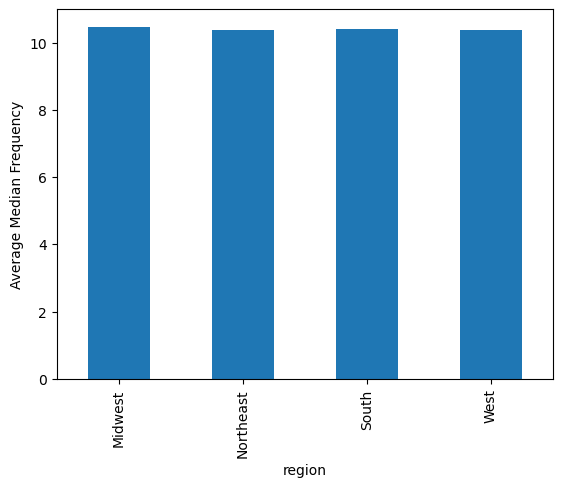

In [64]:
# create a bar chart to visualize 
region_median = region_flag_median.plot.bar()

# customize the plot
plt.ylabel('Average Median Frequency')

# show the plot
plt.show()

### Check ordering habits by price of products

In [66]:
# create a crosstab between the "Region" column and the "price_range_loc" column
pd.crosstab(df['region'],df['price_range_loc'], normalize = 'index', dropna = False)

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.012860,0.312255,0.674885
Northeast,0.012773,0.313302,0.673925
South,0.012893,0.312118,0.674989
West,0.012907,0.312645,0.674448


In [67]:
# check the basic statistics of the product prices for each region
df.groupby('region')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,7597325.0,7.791784,4.240755,1.0,4.2,7.4,11.3,25.0
Northeast,5722736.0,7.781639,4.242175,1.0,4.2,7.4,11.2,25.0
South,10791885.0,7.794065,4.242943,1.0,4.2,7.4,11.3,25.0
West,8292913.0,7.789549,4.242275,1.0,4.2,7.4,11.2,25.0


In [69]:
# calculate the average of product prices for each region
region_flag_prices = df.groupby('region')['prices'].mean()

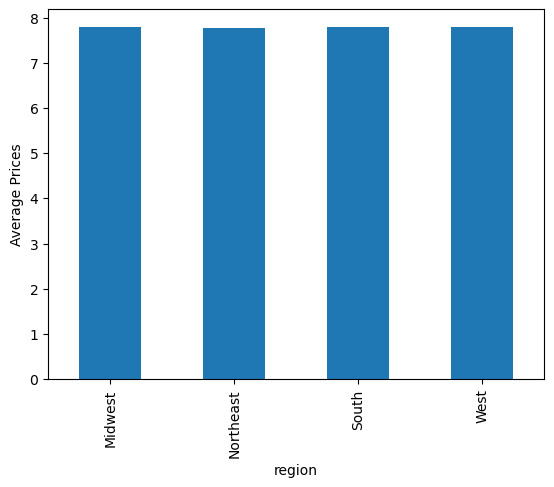

In [70]:
# create a bar chart to visualize 
region_prices = region_flag_prices.plot.bar()

# customize the plot
plt.ylabel('Average Prices')

# show the plot
plt.show()

### Answer: In terms of median of “days_since_last_order”, alls regions have a similar purchase frequency. The average prices of product spent is almost similar across all regions, with the South region having a very slightly higher mean price than the rest.

## 8. Is there a connection between age and family status in terms of ordering habits?

In [85]:
# define the desired order of age_flag categories
age_order = ['Young adult', 'Middle-age', 'Senior']

In [80]:
# define the desired order of status_flag
status_order = ['Married with dependants', 'Married no dependants', 'Single with dependants', 'Single no dependants']

In [86]:
# create a crosstab between the "age_flag" column and the "status_flag" column
crosstab_age_status = pd.crosstab(df['age_flag'], df['status_flag'], normalize = 'index', dropna = False).loc[age_order, status_order]
crosstab_age_status

status_flag,Married with dependants,Married no dependants,Single with dependants,Single no dependants
age_flag,,,,
Young adult,0.413636,0.204428,0.13287,0.249066
Middle-age,0.497732,0.249793,0.00000,0.252475
Senior,0.504943,0.248038,0.00000,0.247019


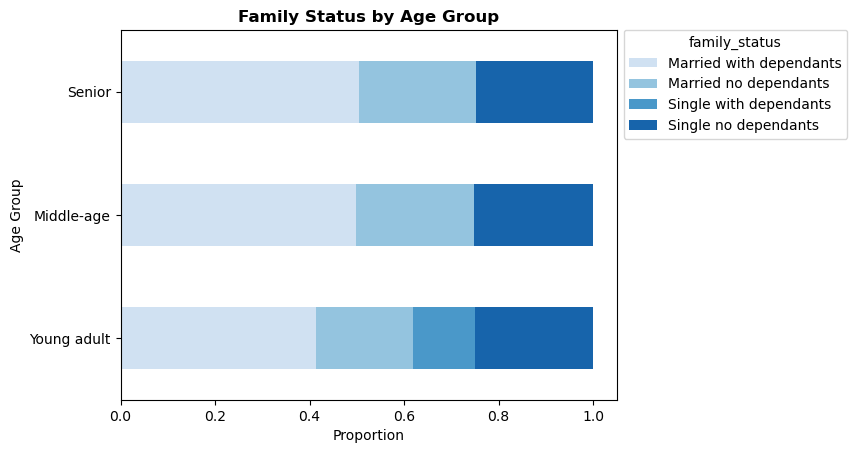

In [87]:
# create the visualization of Family Status by Age Group
age_status = crosstab_age_status.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 4))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.title('Family Status by Age Group', fontweight='bold')
plt.legend(title ='family_status', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

In [89]:
# check the basic statistics of the median frequency for each age and family status category
df.groupby(['age_flag', 'status_flag'])['median_last_orders'].describe()

count       mean       std  min  25%  \
age_flag    status_flag                                                         
Middle-age  Married no dependants    3159057.0  10.472027  7.222976  0.0  6.0   
            Married with dependants  6294669.0  10.465331  7.159472  0.0  6.0   
            Single no dependants     3192981.0  10.281341  7.122501  0.0  6.0   
Senior      Married no dependants    2006158.0  10.410263  7.119914  0.0  6.0   
            Married with dependants  4084028.0  10.346108  7.110604  0.0  6.0   
            Single no dependants     1997915.0  10.358111  7.125466  0.0  6.0   
Young adult Married no dependants    2385689.0  10.387989  7.136262  0.0  6.0   
            Married with dependants  4827147.0  10.378820  7.082015  0.0  6.0   
            Single no dependants     2906607.0  10.468789  7.097346  0.0  6.0   
            Single with dependants   1550603.0  10.323661  7.135934  0.0  6.0   

                                     50%   75%   max  
age_flag    status_flag                               
Middle-age  Married no dependants    8.0  13.0  30.0  
            Married with dependants  8.0  13.0  30.0  
            Single no dependants     7.0  13.0  30.0  
Senior      Married no dependants    8.0  13.0  30.0  
            Married with dependants  8.0  13.0  30.0  
            Single no dependants     8.0  13.0  30.0  
Young adult Married no dependants    8.0  13.0  30.0  
            Married with dependants  8.0  13.0  30.0  
            Single no dependants     8.0  13.0  30.0  
            Single with dependants   8.0  13.0  30.0

In [90]:
# calculate the average of median_frequency 
age_famstatus_median = df.groupby(['age_flag', 'status_flag'])['median_last_orders'].mean().reset_index()
age_famstatus_median

,age_flag,status_flag,median_last_orders
0,Middle-age,Married no dependants,10.472027
1,Middle-age,Married with dependants,10.465331
2,Middle-age,Single no dependants,10.281341
3,Senior,Married no dependants,10.410263
4,Senior,Married with dependants,10.346108
5,Senior,Single no dependants,10.358111
6,Young adult,Married no dependants,10.387989
7,Young adult,Married with dependants,10.378820
8,Young adult,Single no dependants,10.468789
9,Young adult,Single with dependants,10.323661


In [91]:
# pivot the age_famstatus_median
pivot_age_famstatus_median = age_famstatus_median.pivot(index='age_flag', columns='status_flag', values = 'median_last_orders')
pivot_age_famstatus_median

status_flag,Married no dependants,Married with dependants,Single no dependants,Single with dependants
age_flag,,,,
Middle-age,10.472027,10.465331,10.281341,NaN
Senior,10.410263,10.346108,10.358111,NaN
Young adult,10.387989,10.378820,10.468789,10.323661


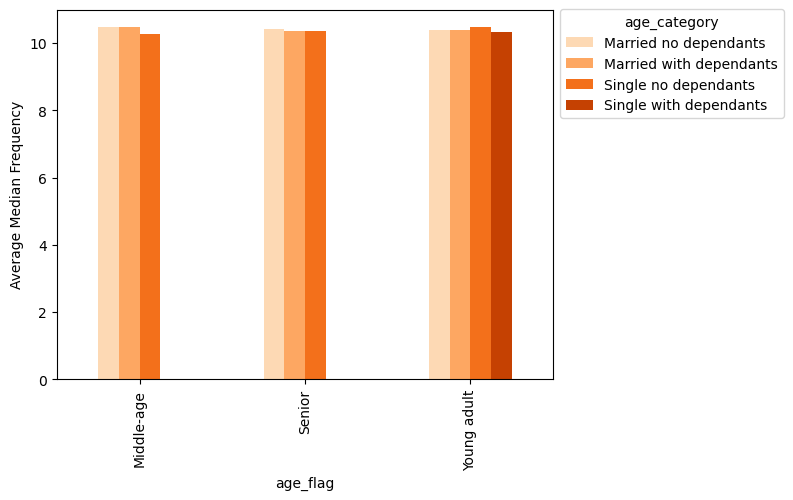

In [93]:
# create a bar chart to visualize 
age_famstatus_median_chart = pivot_age_famstatus_median.plot(kind = 'bar', color = sns.color_palette('Oranges', 4))

# customize the plot
plt.ylabel('Average Median Frequency')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

In [94]:
# check the basic statistics of the product prices for each age and family status category
df.groupby(['age_flag', 'status_flag'])['prices'].describe()

count      mean       std  min  25%  \
age_flag    status_flag                                                        
Middle-age  Married no dependants    3159057.0  7.791455  4.239142  1.0  4.2   
            Married with dependants  6294674.0  7.793482  4.246985  1.0  4.2   
            Single no dependants     3192981.0  7.790217  4.231971  1.0  4.2   
Senior      Married no dependants    2006158.0  7.793834  4.249068  1.0  4.2   
            Married with dependants  4084028.0  7.789430  4.247164  1.0  4.2   
            Single no dependants     1997915.0  7.801406  4.246494  1.0  4.2   
Young adult Married no dependants    2385689.0  7.800394  4.239941  1.0  4.3   
            Married with dependants  4827147.0  7.777553  4.241267  1.0  4.2   
            Single no dependants     2906607.0  7.779768  4.234157  1.0  4.2   
            Single with dependants   1550603.0  7.800004  4.242272  1.0  4.2   

                                     50%   75%   max  
age_flag    status_flag                               
Middle-age  Married no dependants    7.4  11.3  25.0  
            Married with dependants  7.4  11.3  25.0  
            Single no dependants     7.4  11.2  25.0  
Senior      Married no dependants    7.4  11.3  25.0  
            Married with dependants  7.4  11.3  25.0  
            Single no dependants     7.4  11.3  25.0  
Young adult Married no dependants    7.4  11.3  25.0  
            Married with dependants  7.3  11.2  25.0  
            Single no dependants     7.4  11.2  25.0  
            Single with dependants   7.4  11.3  25.0

In [95]:
# calculate the average of the product prices
age_famstatus_prices = df.groupby(['age_flag', 'status_flag'])['prices'].mean().reset_index()
age_famstatus_prices

,age_flag,status_flag,prices
0,Middle-age,Married no dependants,7.791455
1,Middle-age,Married with dependants,7.793482
2,Middle-age,Single no dependants,7.790217
3,Senior,Married no dependants,7.793834
4,Senior,Married with dependants,7.789430
5,Senior,Single no dependants,7.801406
6,Young adult,Married no dependants,7.800394
7,Young adult,Married with dependants,7.777553
8,Young adult,Single no dependants,7.779768
9,Young adult,Single with dependants,7.800004


In [96]:
# pivot the age_famstatus_prices
pivot_age_famstatus_prices = age_famstatus_prices.pivot(index='age_flag', columns='status_flag', values = 'prices')
pivot_age_famstatus_prices

status_flag,Married no dependants,Married with dependants,Single no dependants,Single with dependants
age_flag,,,,
Middle-age,7.791455,7.793482,7.790217,NaN
Senior,7.793834,7.789430,7.801406,NaN
Young adult,7.800394,7.777553,7.779768,7.800004


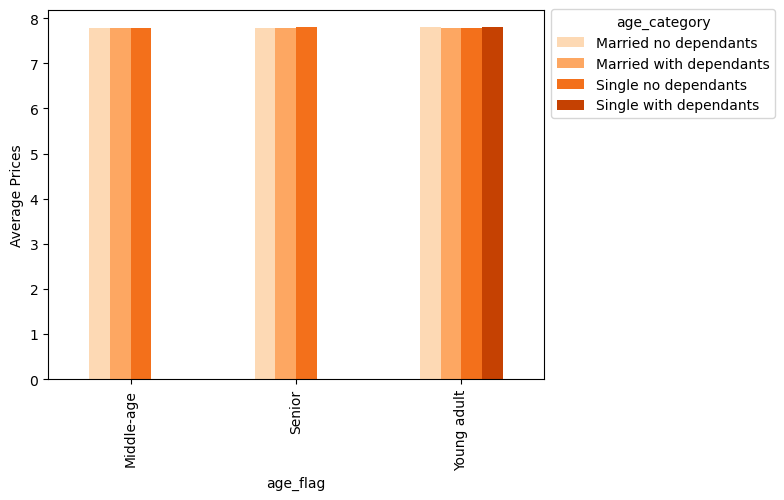

In [97]:
# create a bar chart to visualize 
age_famstatus_prices_chart = pivot_age_famstatus_prices.plot(kind = 'bar', color = sns.color_palette('Oranges', 4))

# customize the plot
plt.ylabel('Average Prices')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

### Answer:  In terms of frequency (days since last order) middle aged persons, who are single and have no dependents have the highest order frequency, closely followed by young adults, who are single with dependents. Middle aged customers who dont have dependents have the lowest order frequency.  In general young adults have a slightly higher order frequency and middle aged customers a slightly lower order frequency.

## 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

Classification based on certain type of goods

In [99]:
df.loc[df['department_id']==18,'Profile']='Customers with babies'
df.loc[df['department_id']==8,'Profile']='Customers with pets'
df.loc[df['department_id']==12,'Profile']='Customers who eat meat'
df.loc[~df['department_id'].isin([8,12,18]),'Profile']='Customers with other product'

In [100]:
df['Profile'].value_counts(dropna=False)

Customers with other product    31174414
Customers who eat meat            708927
Customers with babies             423802
Customers with pets                97716
Name: Profile, dtype: int64

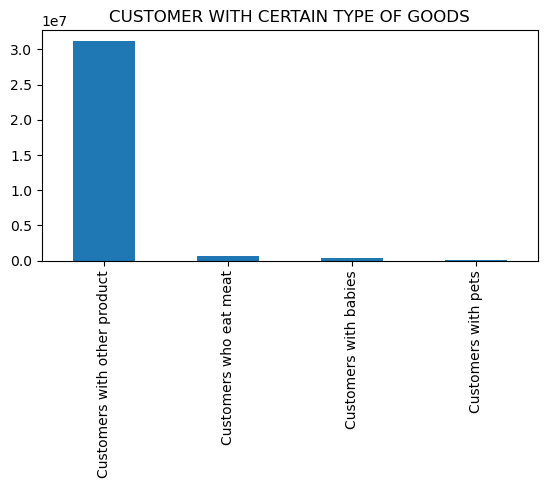

In [105]:
# create a bar chart to visualize 
profile=df['Profile'].value_counts(dropna=False).plot.bar(title='CUSTOMER WITH CERTAIN TYPE OF GOODS')
plt.subplots_adjust(bottom=0.4) #adjust margins

In [104]:
# export the plot
profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profile.png'))

### Answer: Age, income, department, family status & certain types of goods (customers who eat meat, customers with babies, customers with pets)